In [18]:
import numpy as np 
import h5py as h5
import matplotlib.pyplot as plt
from scipy.signal import periodogram, welch, lfilter
from scipy.fft import rfft, irfft, rfftfreq
from scipy.optimize import curve_fit, least_squares

In [2]:
f = h5.File("xueshi_data.hdf5",'r')


In [3]:
datasets = ['electronic', 'shotnoise', 'squeezing', 'antisqueezing']
channels = ['C1', 'C2', 'C3', 'C4']

for ds in datasets:
    data = np.array([f[ds][c][c][:] for c in channels])
    data = data.squeeze()
    globals()[ds] = data


In [4]:
electronic.shape, shotnoise.shape, squeezing.shape, antisqueezing.shape

((4, 200, 100002), (4, 200, 100002), (4, 200, 100002), (4, 200, 100002))

In [8]:
dt = f['shotnoise']['C1'].attrs["horiz_interval"]
fs = 1/dt
N = len(electronic[0,0])
t = np.linspace(0, fs*N, N, endpoint=False)
f = rfftfreq(N, dt)

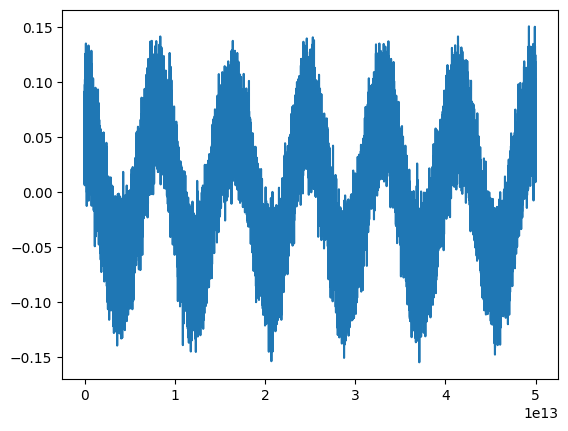

In [9]:
plt.plot(t, antisqueezing[0,0])

In [16]:
from scipy.signal import iirdesign
a,b = iirdesign([0.01,0.9],[0.27,0.39], gpass=0.1, gstop=10)

[]

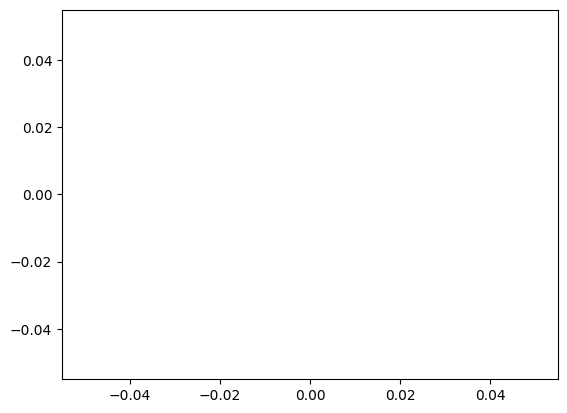

In [21]:
plt.plot(filtered_electronics_lfilter = lfilter(b, a, electronic))